<a href="https://colab.research.google.com/github/ssjsmith750/Customer_conversion_prediction_project/blob/main/customer_prediction_conversion_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 75.6 MB/s eta 0:00:00


In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 14.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataprep
from dataprep.eda import create_report
import plotly.express as px
import dash
from dataprep.datasets import load_dataset

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df

age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  
0              1      unknown   no  
1              1      unknown   no  
2              1      unknown   no  
3              1      unknown   no  
4              1      unknown   no  
...          ...          ...  ...  
45206          3      unknown  yes  
45207          2      unknown  yes  
45208          5      success  yes  
45209          4      unknown   no  
45210          2        other   no  

[45211 rows x 11 columns]

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no

# **1.DATA CLEANING**

Important 5 Things in Data Cleaning
# 1.Null Values
# 2.Duplicates
# 3.structure
# 4.Format
# 5.outliers

In [ ]:
#Checking all the columns are in right Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
# checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
# checking for the duplicate values
df.duplicated().sum()

6

In [ ]:
df = df.drop_duplicates()        #duplicated values dropped
df.shape  

(45205, 11)

**Keeping the original dataset and creating a copy of dataset**

In [ ]:
df1 = df

In [ ]:
df1.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no

# **Replacing the Unknown values**

In [ ]:
df1['Target'] = df1['y'].map({"yes":1,"no":0})
df1

<ipython-input-75-792ec5d19eac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  Target  
0              1      unknown   no       0  
1              1      unknown   no       0  
2              1      unknown   no       0  
3              1      unknown   no       0  
4              1      unknown   no       0  
...          ...          ...  ...     ...  
45206          3      unknown  yes       1  
45207          2      unknown  yes       1  
45208          5      success  yes       1  
45209          4      unknown   no       0  
45210          2        other   no       0  

[45205 rows x 12 columns]

In [ ]:
df1 = df.drop('y', axis=1)

In [ ]:
df1.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome  Target  
0          1      unknown       0  
1          1      unknown       0  
2          1      unknown       0  
3          1      unknown       0  
4          1      unknown       0

# **Outlier Deduction and Correction**
While Checking for the outliers, It can be clearly seen that there are some outliers.

Best Appraoch for Outliers is : **IQR** (Inter Quantile Range)

IQR = Q3-Q1

Any value > Q3 + (1.5*IQR) ------ = Outlier

Any value < Q1 - (1.5*IQR) ------ = Outlier

**Outlier Detection**

In [ ]:
#Checking for outliers
df1.describe()  

age          day           dur     num_calls        Target
count  45205.000000  45205.00000  45205.000000  45205.000000  45205.000000
mean      40.937087     15.80688    258.183055      2.763898      0.117000
std       10.619130      8.32234    257.538504      3.098189      0.321424
min       18.000000      1.00000      0.000000      1.000000      0.000000
25%       33.000000      8.00000    103.000000      1.000000      0.000000
50%       39.000000     16.00000    180.000000      2.000000      0.000000
75%       48.000000     21.00000    319.000000      3.000000      0.000000
max       95.000000     31.00000   4918.000000     63.000000      1.000000

In [ ]:
lower_thershold= []
upper_thershold= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= df1[i].quantile(0.75) - df1[i].quantile(0.25)
    lower_bound= df1[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df1[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_thershold.append(lower_bound)
    upper_thershold.append(upper_bound)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


**outlier Correction**

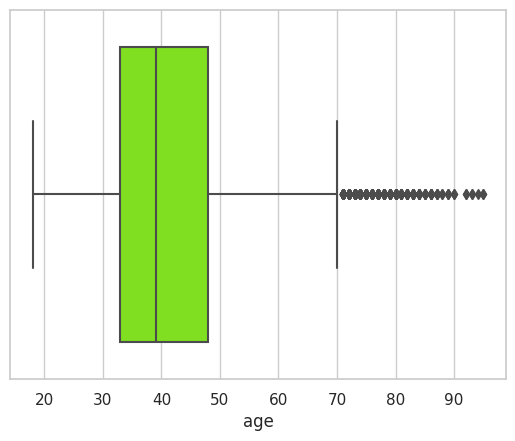

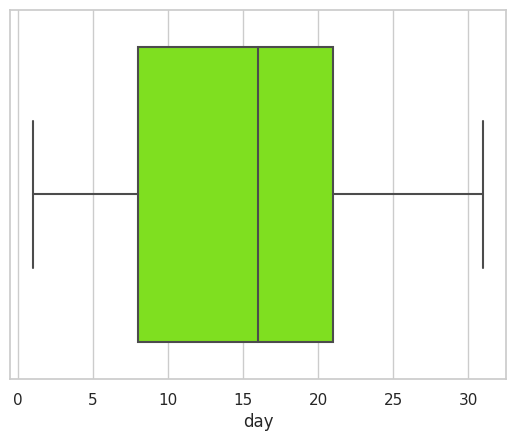

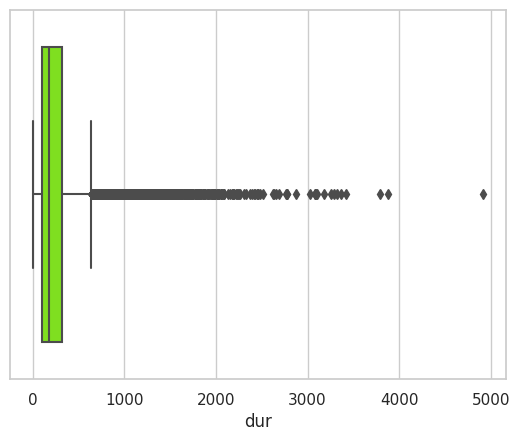

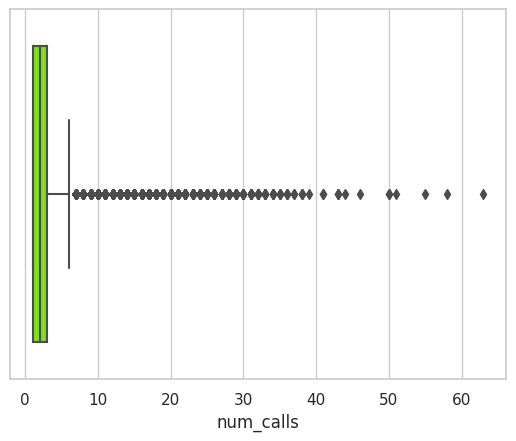

In [ ]:
#Age box plot
sns.set(style="whitegrid")
sns.boxplot(x=df1['age'], color='Chartreuse')
plt.show()

#Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(x=df1['day'], color='Chartreuse')
plt.show()

# Box Plot for Dur column
sns.set(style="whitegrid")
sns.boxplot(x=df1['dur'], color='chartreuse')
plt.show()

# Box Plot for num_calls Column
sns.set(style="whitegrid")
sns.boxplot(x=df1['num_calls'], color='chartreuse')
plt.show()




From the plots it can be clearly seen that there are outliers in **(Age,dur,num_calls)** and no outliers in the day column

**Outlier Correction**

**Removing outlier for Age**

In [ ]:
df1.age = df1.age.clip(10.5,70.5)

In [ ]:
df1.age.describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

**Removing outlier for dur**

In [ ]:
df1.dur = df1.dur.clip(-221.0 , 643.0)
df1.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

**Removing outlier for num_calls**

In [ ]:
df1.num_calls = df1.num_calls.clip(-2.0 , 6.0)
df1.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

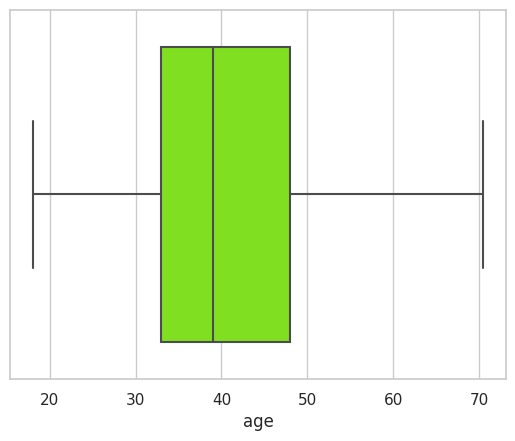

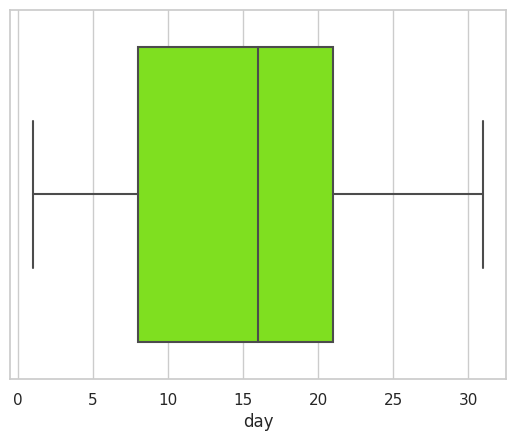

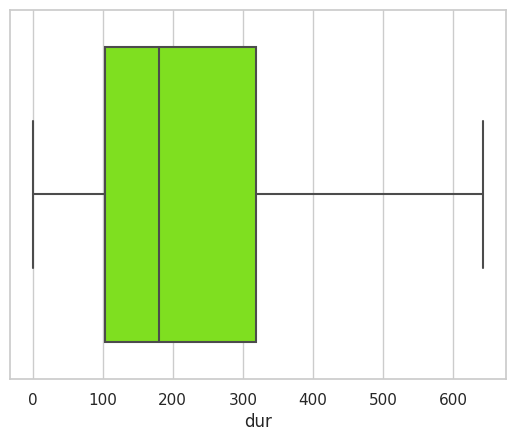

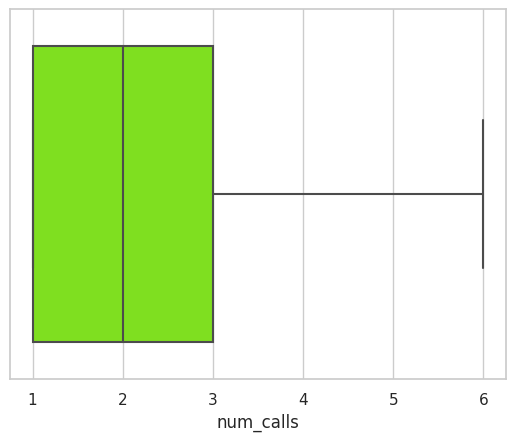

In [ ]:
#Age box plot
sns.set(style="whitegrid")
sns.boxplot(x=df1['age'], color='Chartreuse')
plt.show()

#Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(x=df1['day'], color='Chartreuse')
plt.show()

# Box Plot for Dur column
sns.set(style="whitegrid")
sns.boxplot(x=df1['dur'], color='chartreuse')
plt.show()

# Box Plot for num_calls Column
sns.set(style="whitegrid")
sns.boxplot(x=df1['num_calls'], color='chartreuse')
plt.show()

# **EDA - Exploratory Data Analysis**

EDA is an important step in the data analysis process, as it helps for a better understanding to identify the Date and relationships between variables and also the missing values and errors before further analysis.

# **Distribution of Feature and Target variable**

/usr/local/lib/python3.9/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



DataPrep Report
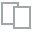
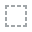
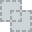
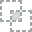
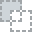
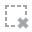
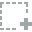
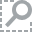
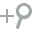
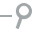
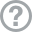
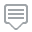
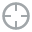
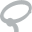
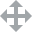
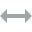
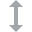
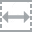
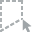
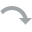
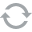
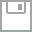
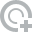
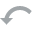
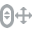
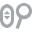
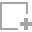
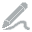
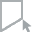
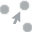
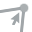
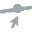

In [ ]:
create_report(df1)

In [ ]:
fig=px.bar(df1,x="education_qual",y="Target",hover_name="job",color="marital",animation_frame="age")
fig.show()

# **From the Above Plots we can cleary see that:**



* The most targetted Age Catogory is between **20-60** years.

* **Blue-collar, Management, Technician** are highly targetted.

* **Married** people are highly targetted.

* In Education Catagory **Secondary Education** people are highly targetted.

* **Cellular calls** are high while comparing unknown & telephone.

* From **15th - 22nd** of a month is highly targetted.

* Targetted huge number of customers in the month of **May**.

* Customers who have converted have been called only **once in a Time**.

* In previous outcome Most rates are **unknown**.

* While comparing - **NO** (88.30%) plays a major role in target.


# **FEATURE VS TARGET**

**Catagorical Feature vs Target**

Text(0, 0.5, 'count')

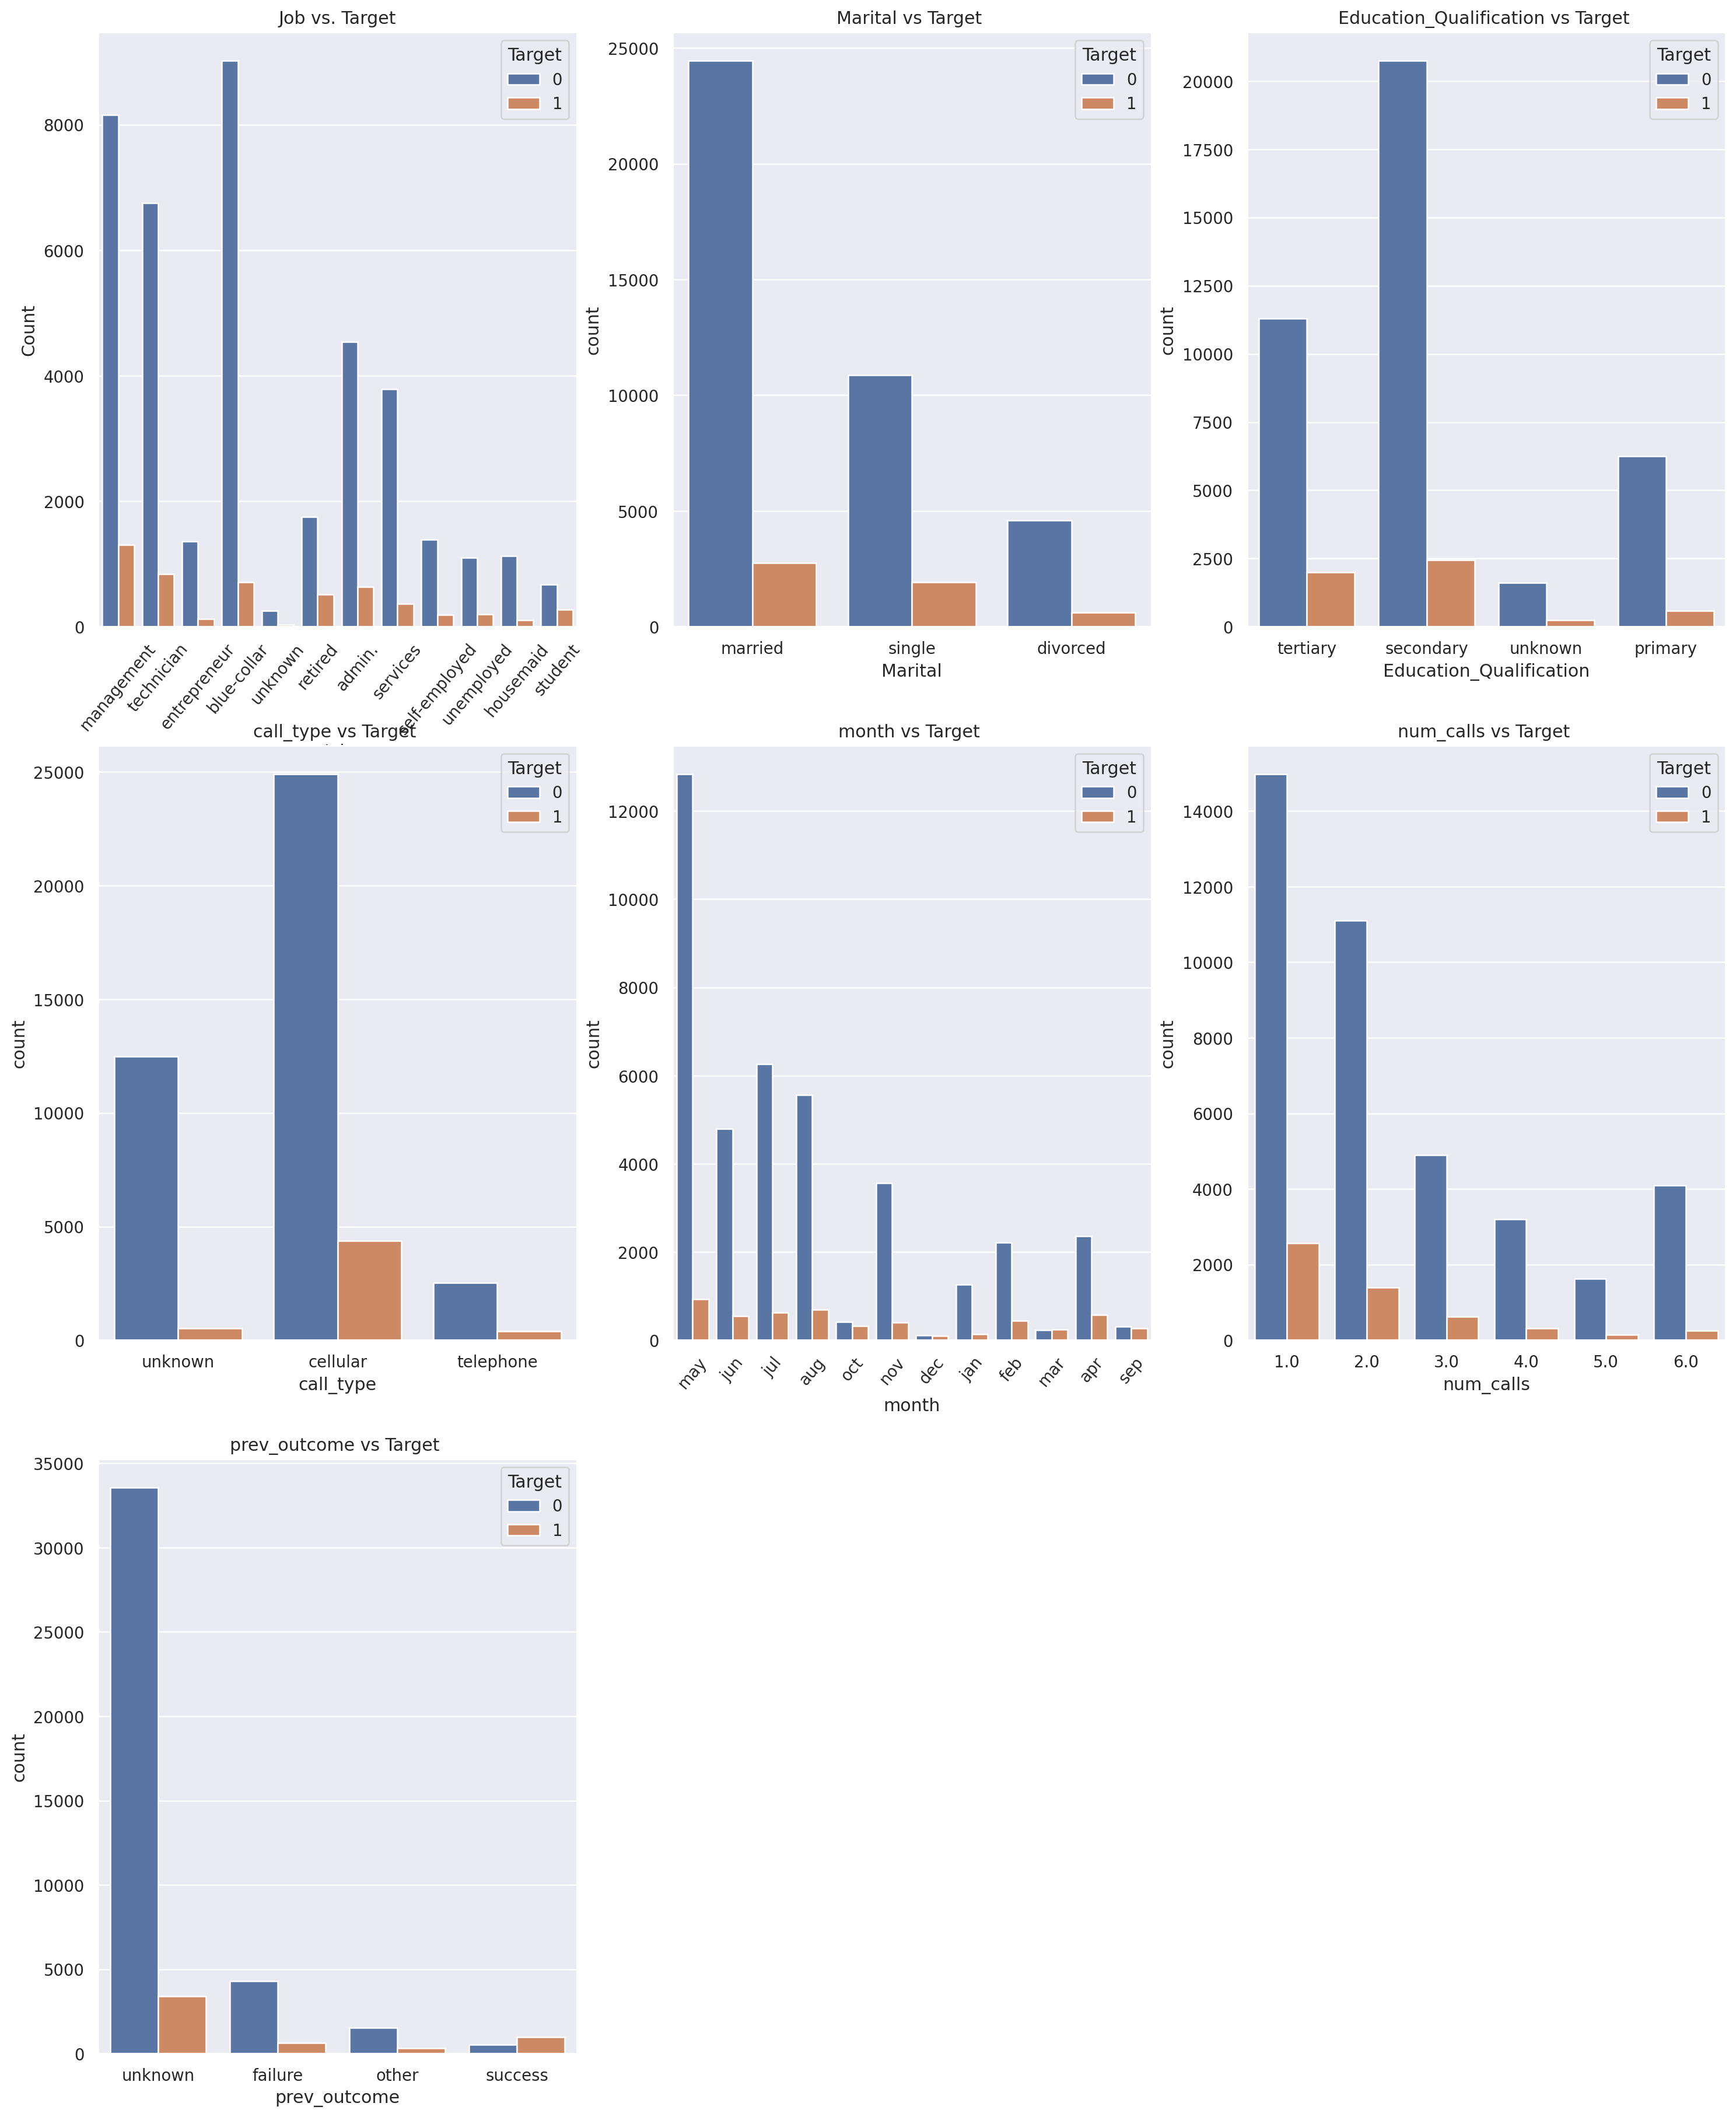

In [ ]:

plt.figure(figsize=(20,25),dpi=180)

#Job vs Target
sns.set(style="darkgrid")

plt.subplot(3,3,1)
sns.countplot(x="job", hue="Target", data=df1)
plt.xticks(rotation=50)

plt.title("Job vs. Target")
plt.xlabel("Job")
plt.ylabel("Count")

#plt.show()

# Marital vs Target

sns.set(style="darkgrid")

plt.subplot(3,3,2)
sns.countplot(x="marital", hue="Target",data=df1)
plt.title("Marital vs Target ")
plt.xlabel("Marital")
plt.ylabel("count")

#plt.show()


############ Education_Qualification vs Target ############

sns.set(style="darkgrid")

plt.subplot(3,3,3)
sns.countplot(x="education_qual", hue="Target",data=df1)
plt.title("Education_Qualification vs Target ")
plt.xlabel("Education_Qualification")
plt.ylabel("count")

#plt.show()


############ call_type vs Target ############

sns.set(style="darkgrid")

plt.subplot(3,3,4)
sns.countplot(x="call_type", hue="Target",data=df1)
plt.title("call_type vs Target ")
plt.xlabel("call_type")
plt.ylabel("count")

#plt.show()


############ Month vs Target ############

sns.set(style="darkgrid")

plt.subplot(3,3,5)
sns.countplot(x="mon", hue="Target",data=df1)
plt.xticks(rotation=50)
plt.title("month vs Target ")
plt.xlabel("month")
plt.ylabel("count")

#plt.show()


############# num_calls vs Target ############

sns.set(style="darkgrid")


plt.subplot(3,3,6)
sns.countplot(x="num_calls", hue="Target",data=df1)
plt.title("num_calls vs Target ")
plt.xlabel("num_calls")
plt.ylabel("count")

#plt.show()


############# prev_outcome vs Target ############

sns.set(style="darkgrid")

plt.subplot(3,3,7)
sns.countplot(x="prev_outcome", hue="Target",data=df1)
plt.title("prev_outcome vs Target ")
plt.xlabel("prev_outcome")
plt.ylabel("count")

#plt.show()


# **Categorical Data Vs Target**

**Job**

Management customers are said Yes
Blue collar customers said No

**Marital**

Married people said yes
married people said No

**Qualification**

Secondary Education people says Yes
Secondary Education people says No

**call Type**

Calls Made through cellullar  says Yes
calls Made through cellullar  says No

**Month**

May month has the Heighst Yes
May month has the Heighst No

**Previous_outcome**

Unknown Calls have Heighst Yes
Unknown Calls have Heighst No



# **Numerical Feature vs Target -- Age, Day, Duration, No of Calls**

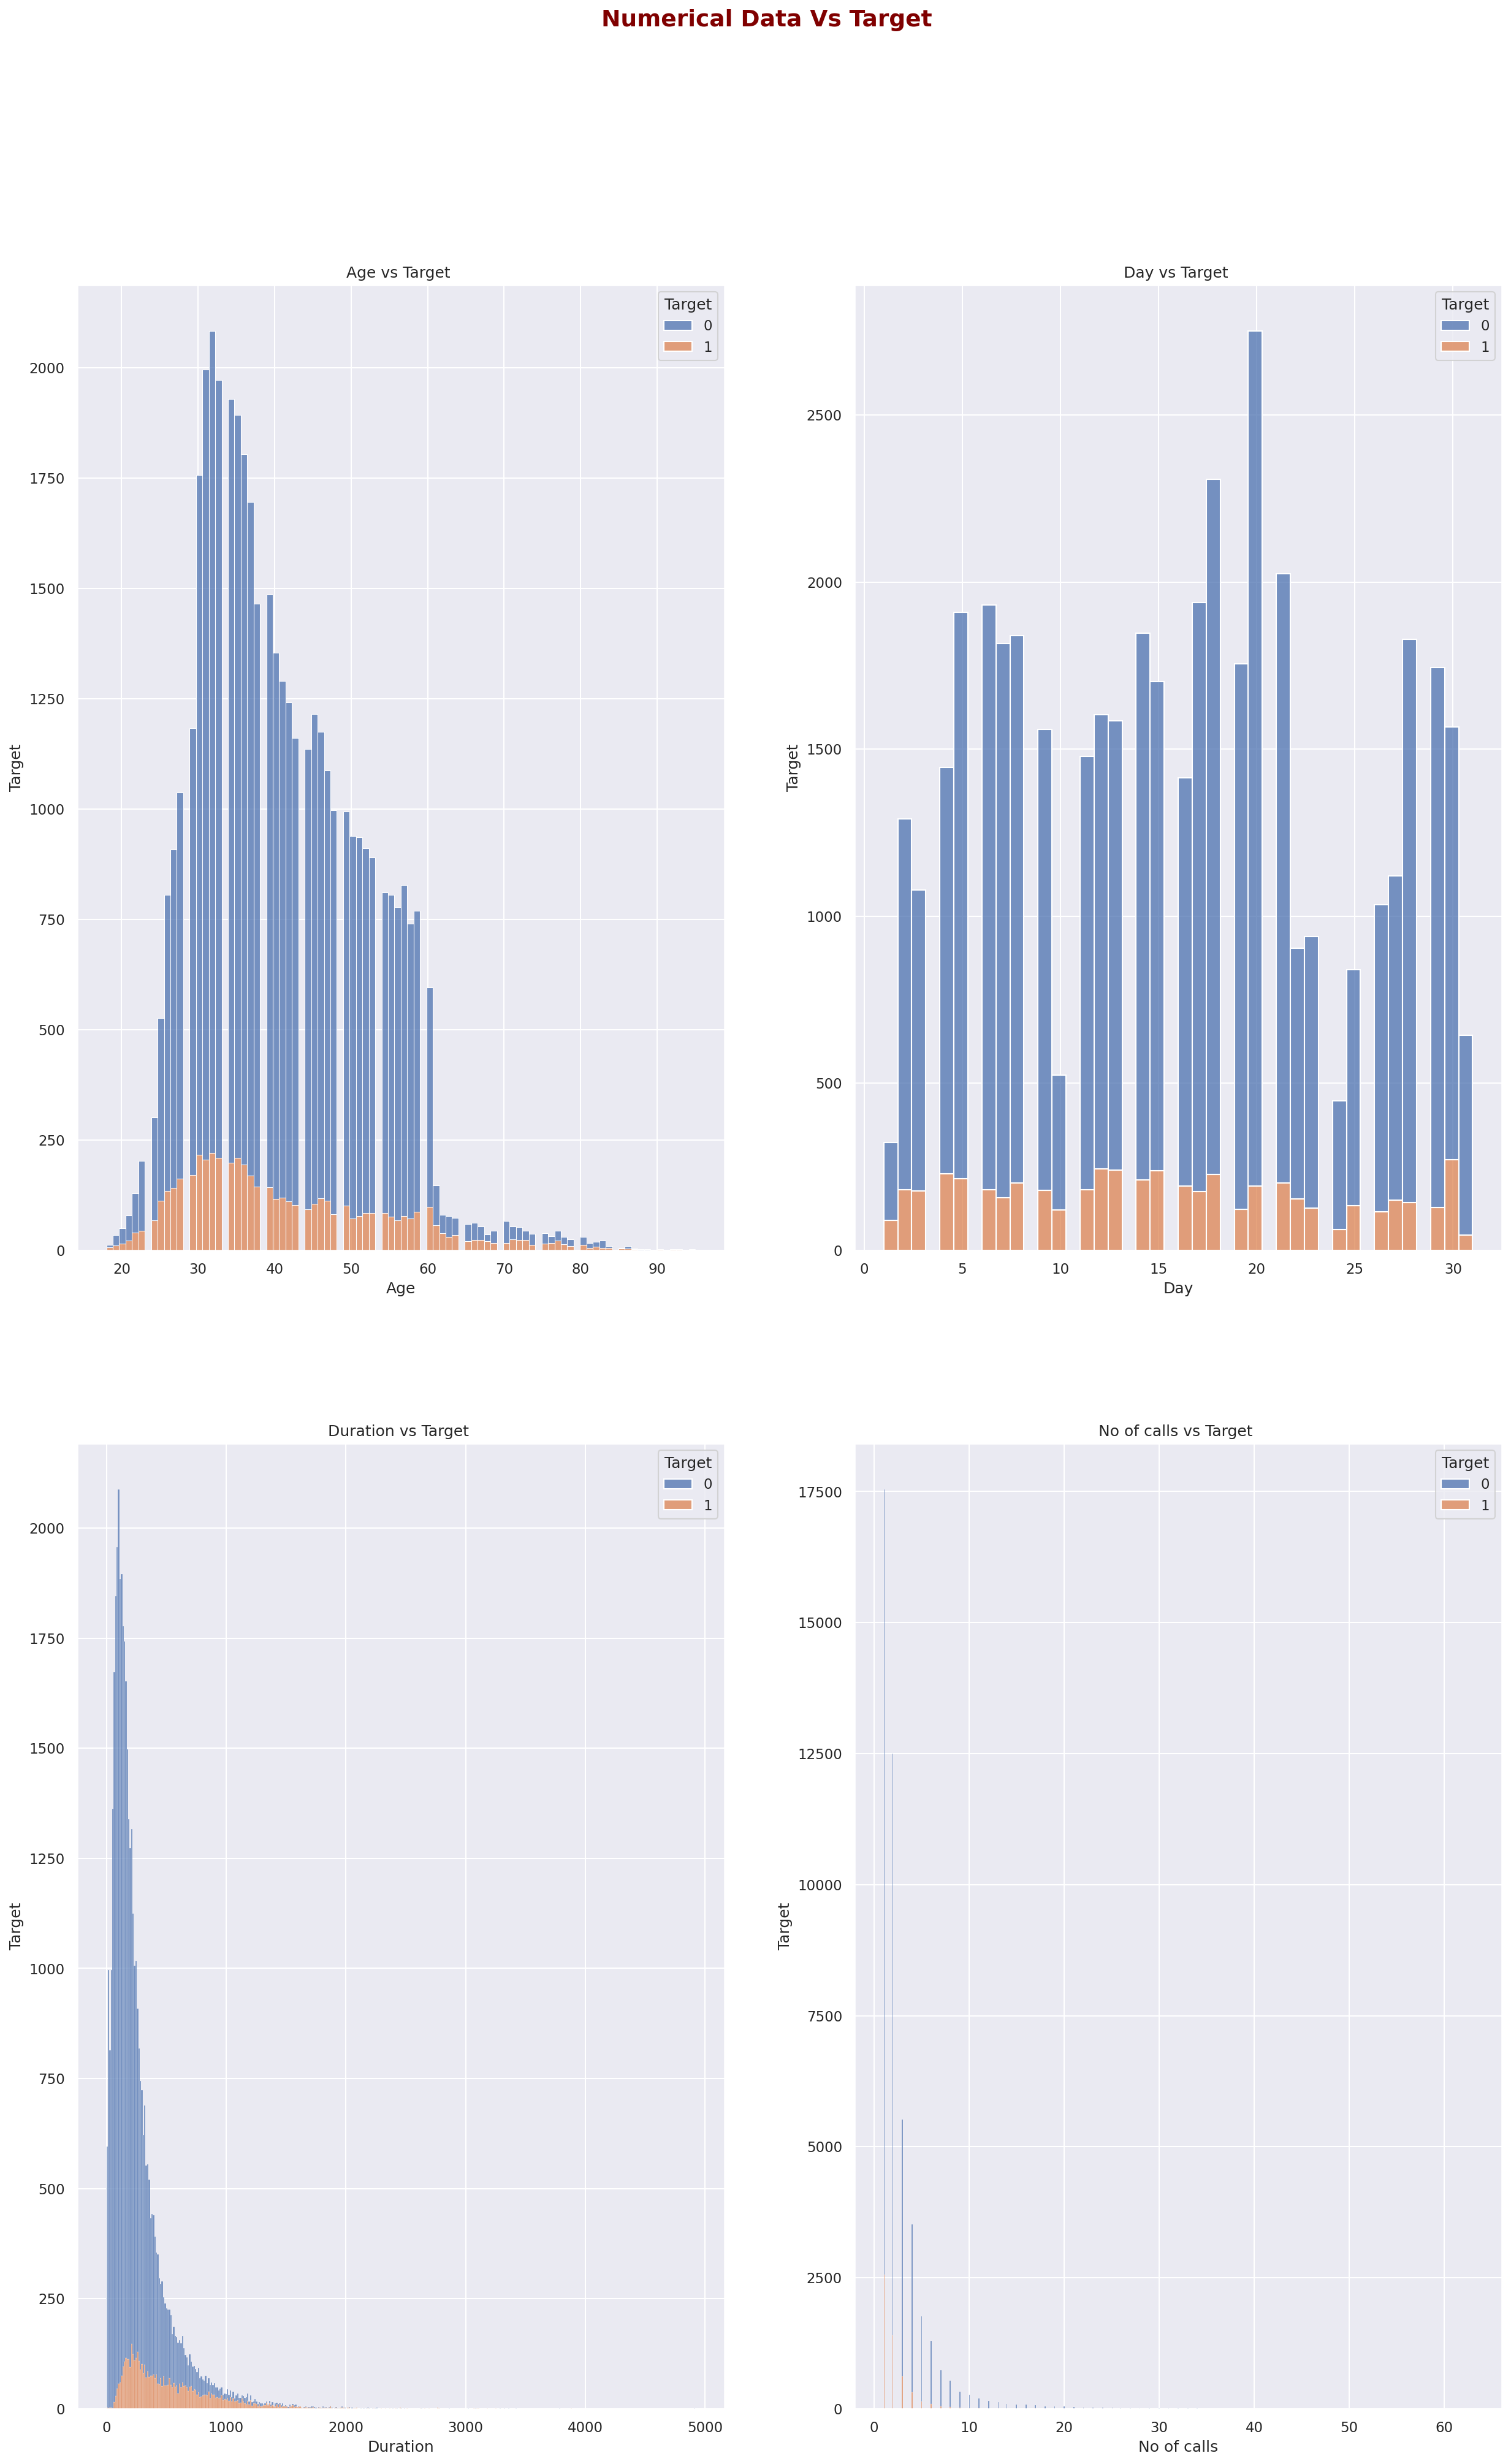

In [ ]:
plt.figure(figsize=(20,30),dpi=150)
#sub title to show title for overall plot 
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
sns.histplot(data=df, x="age", hue="Target", multiple="stack")
plt.title("Age vs Target ")
plt.xlabel("Age")
plt.ylabel("Target")

#Day vs Target
plt.subplot(2,2,2)
sns.histplot(data=df, x="day", hue="Target", multiple="stack")
plt.title("Day vs Target ")
plt.xlabel("Day")
plt.ylabel("Target")

#Duration vs Target
plt.subplot(2,2,3)
sns.histplot(data=df, x="dur", hue="Target", multiple="stack")
plt.title("Duration vs Target ")
plt.xlabel("Duration")
plt.ylabel("Target")

#No of calls vs Target
plt.subplot(2,2,4)
sns.histplot(data=df, x="num_calls", hue="Target", multiple="stack")
plt.title("No of calls vs Target ")
plt.xlabel("No of calls")
plt.ylabel("Target")

plt.show()


# **Numerical Feature vs Target**

**Age**

Middle age people are Highly Targetted
Middle age people are Highly Subscribed

**Days**

15 - 24 of a month is highly targetted

15 - 24 of a month has higher subscribtion

**Duration**

Higher the call duration higher the subscription

**No of Calls **

No of calls increases subscription also increased

**Feature vs Target Distribution --- No fo people Subscribed**

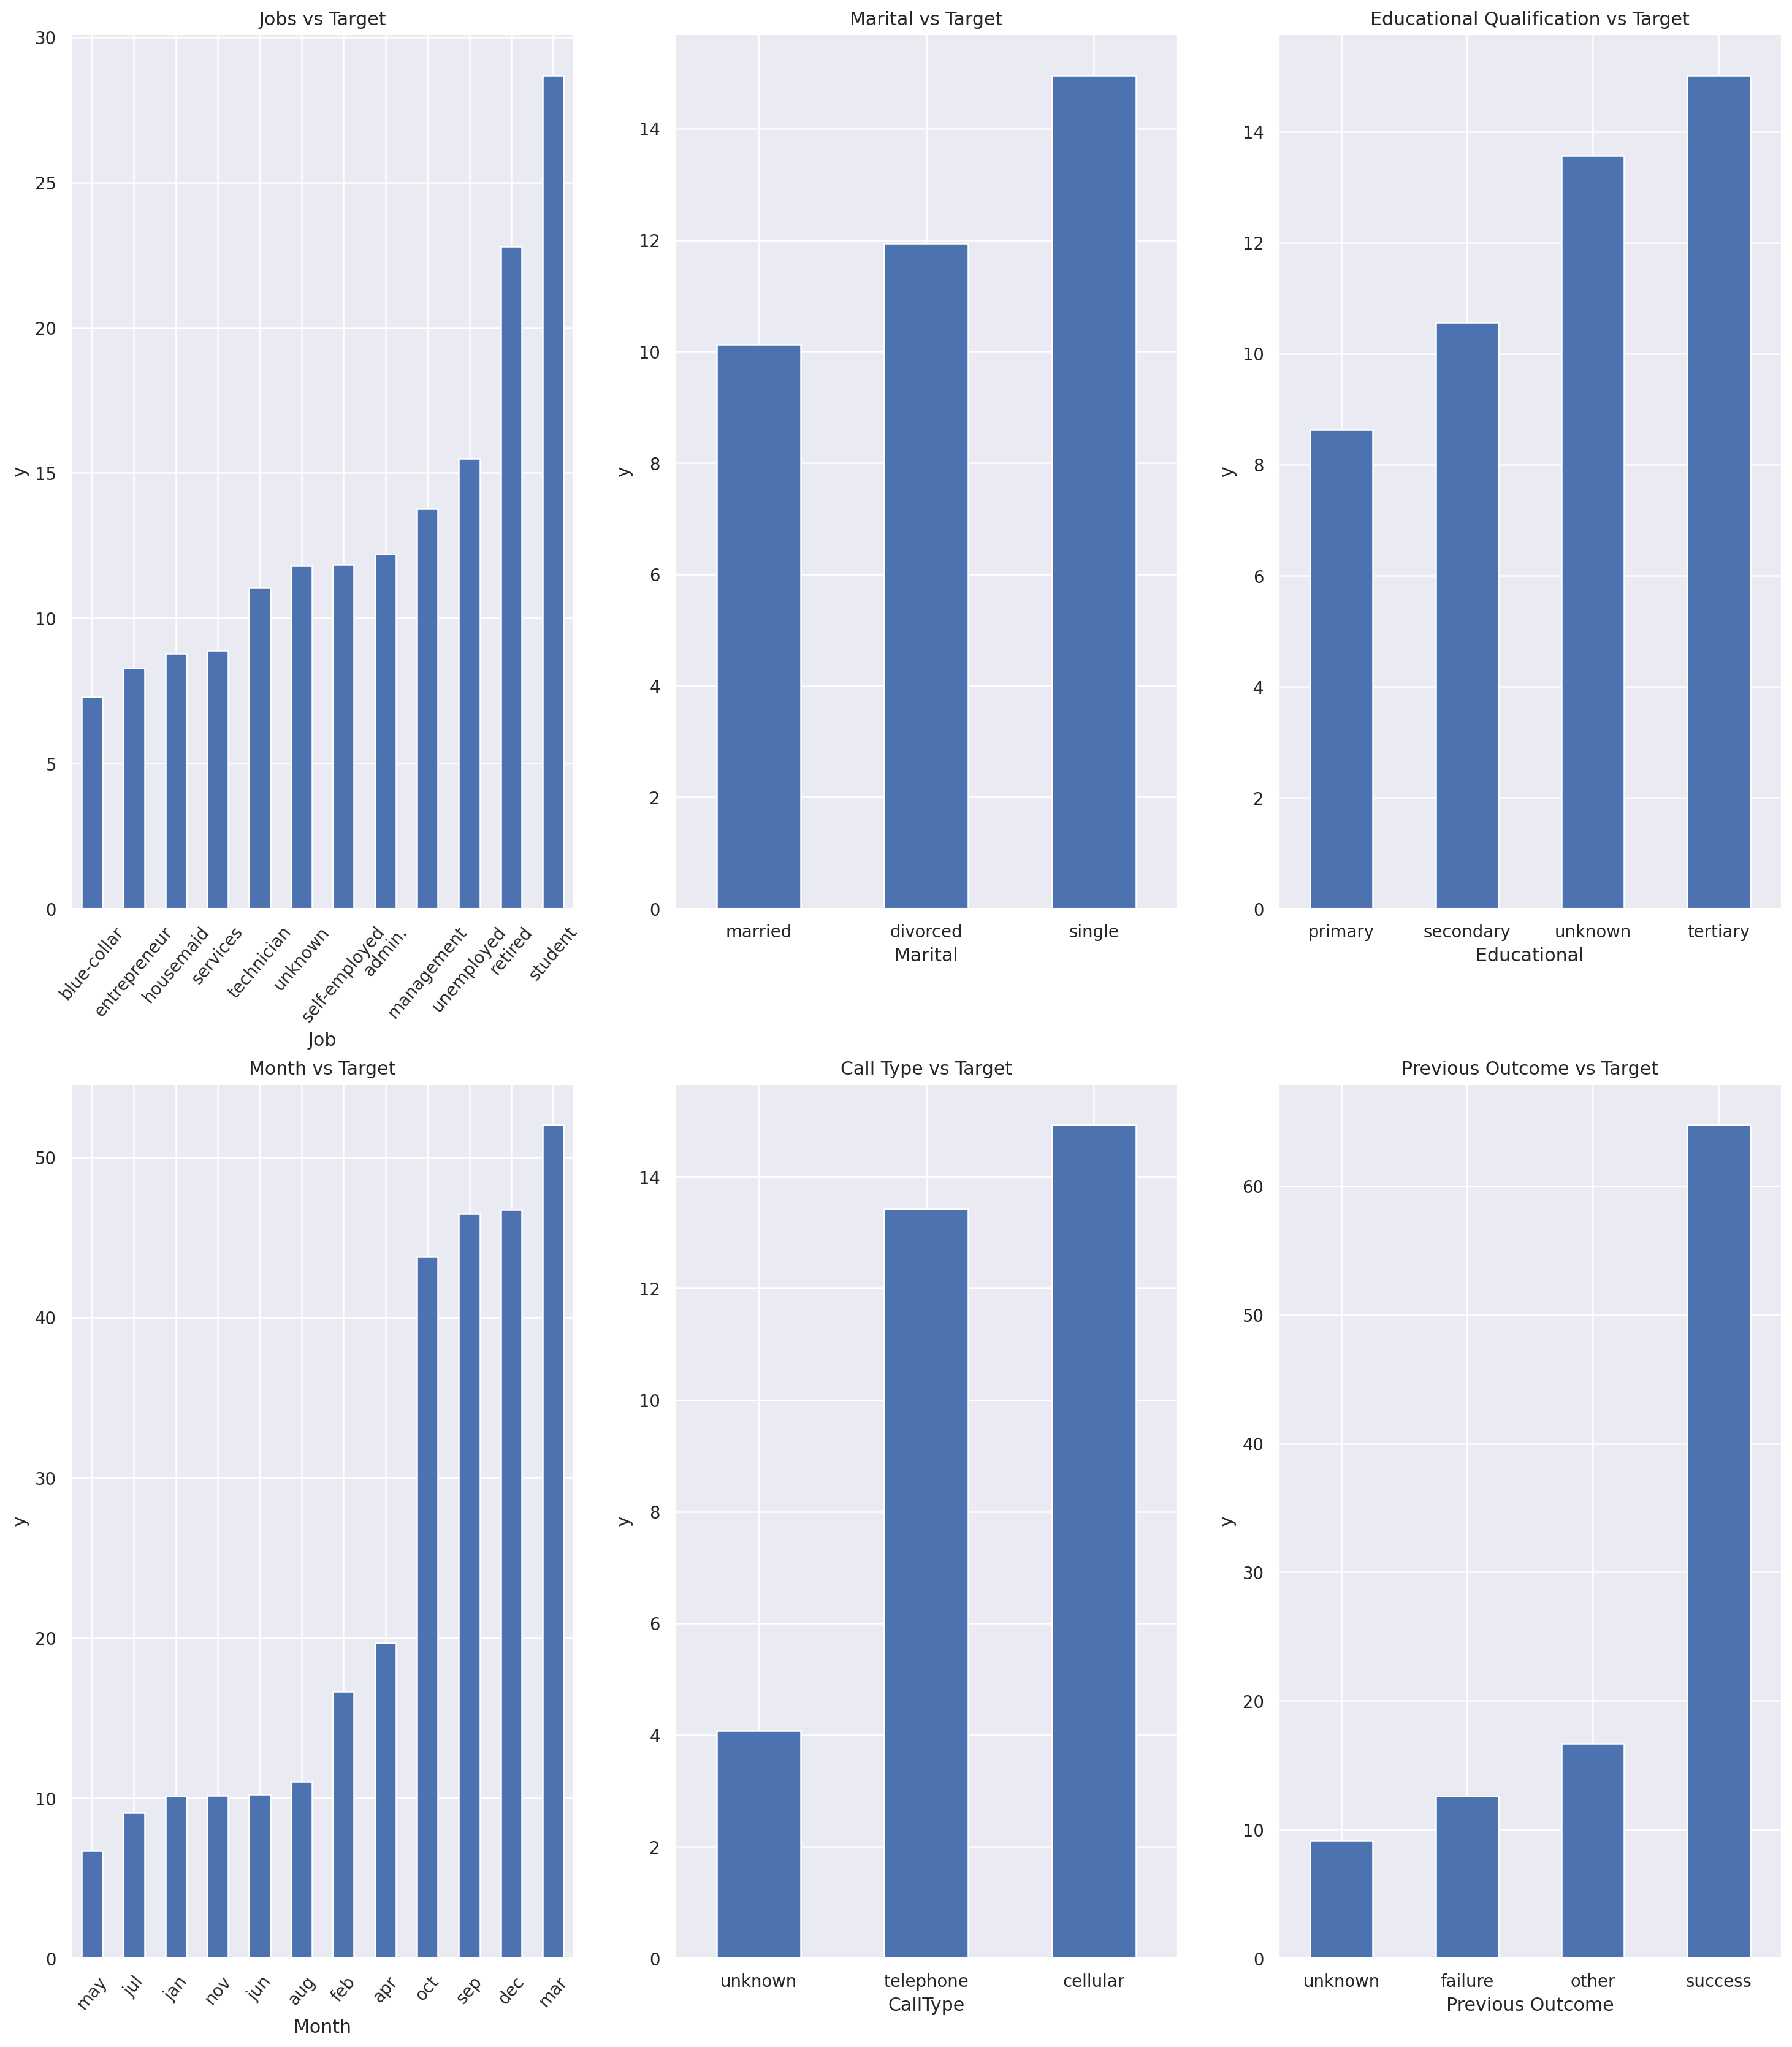

In [ ]:
plt.figure(figsize=(20,35), dpi=180)

#Jobs vs Target
plt.subplot(3,3,1)
(df1.groupby('job')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Jobs vs Target')
plt.xlabel('Job')
plt.ylabel('y')

#Marital vs Target
plt.subplot(3,3,2)
(df1.groupby('marital')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.title('Marital vs Target')
plt.xlabel('Marital')
plt.ylabel('y')

#Educational Qualification vs Target
plt.subplot(3,3,3)
(df1.groupby('education_qual')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.title('Educational Qualification vs Target')
plt.xlabel('Educational')
plt.ylabel('y')

#Month vs Target
plt.subplot(3,3,4)
(df1.groupby('mon')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Month vs Target')
plt.xlabel('Month')
plt.ylabel('y')

#Call Type vs Target
plt.subplot(3,3,5)
(df1.groupby('call_type')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.title('Call Type vs Target')
plt.xlabel('CallType')
plt.ylabel('y')

#Previous Outcome vs Target
plt.subplot(3,3,6)
(df1.groupby('prev_outcome')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.title('Previous Outcome vs Target')
plt.xlabel('Previous Outcome')
plt.ylabel('y')


plt.show()




**Percentage of people Subscribed -- Categorical Data Vs Target (Categorical)**


**Jobs**

Most subscribed customers are Student & retired

Least Subscribed are blue-collar


**Marital Status**

Most subscribed customer are  Single

Least Subscribed customers are  Married

**Educational Qualification**

Most subscribed customers are  teritary

Least Subscribed customers are  primary

**Month**


Most of the subscription are made between  March, September

Least Subscription are made in the month  of May

**Call Type**

Most subscribed calls are made by  Cellular

Least Subscribed calls are unknown

**Previous Outcome**

Most subscribed outcomes are  Success

Least Subscribed outcomes are  unknown

# **ENCODING**

In [ ]:
df1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Target'],
      dtype='object')

# **JOB**

In [ ]:
#no of counts unique values
df1.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df1['job'] = df1['job'].replace('unknown',np.nan)

In [ ]:
#checking for null values
df1.job.isnull().sum()

288

In [ ]:
df1 = df1.dropna(subset=['job'])

In [ ]:
df1.job.isnull().sum()

0

In [ ]:
df1.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [ ]:
df1['job']=df1['job'].map({'management':1,'technician':2,'entrepreneur':3,'blue-collar':4,'retired':5,'admin.':6,'services':7, 'self-employed':8, 'unemployed': 9, 'housemaid':10,'student' : 11})   


In [ ]:
df1.job.dtype

dtype('int64')

In [ ]:
df1

age  job   marital education_qual  call_type  day  mon   dur  \
0       58    1   married       tertiary    unknown    5  may   261   
1       44    2    single      secondary    unknown    5  may   151   
2       33    3   married      secondary    unknown    5  may    76   
3       47    4   married        unknown    unknown    5  may    92   
5       35    1   married       tertiary    unknown    5  may   139   
...    ...  ...       ...            ...        ...  ...  ...   ...   
45206   51    2   married       tertiary   cellular   17  nov   977   
45207   71    5  divorced        primary   cellular   17  nov   456   
45208   72    5   married      secondary   cellular   17  nov  1127   
45209   57    4   married      secondary  telephone   17  nov   508   
45210   37    3   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome  Target  
0              1      unknown       0  
1              1      unknown       0  
2              1      unknown       0  
3              1      unknown       0  
5              1      unknown       0  
...          ...          ...     ...  
45206          3      unknown       1  
45207          2      unknown       1  
45208          5      success       1  
45209          4      unknown       0  
45210          2        other       0  

[44917 rows x 11 columns]

# **Marital**

In [ ]:
df1.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df1['marital'] = df1['marital'].map({'married':1,'single':2,'divorced':3})
df1.head()

age  job  marital education_qual call_type  day  mon  dur  num_calls  \
0   58    1        1       tertiary   unknown    5  may  261          1   
1   44    2        2      secondary   unknown    5  may  151          1   
2   33    3        1      secondary   unknown    5  may   76          1   
3   47    4        1        unknown   unknown    5  may   92          1   
5   35    1        1       tertiary   unknown    5  may  139          1   

  prev_outcome  Target  
0      unknown       0  
1      unknown       0  
2      unknown       0  
3      unknown       0  
5      unknown       0

# **Educational Qualification**

In [ ]:
df1.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
#replacing unknown value as null
df1['education_qual'] =df1['education_qual'].replace('unknown',np.nan)

In [ ]:
#checking for null values
df1.education_qual.isnull().sum()

1730

In [ ]:
#droping the null values
df1 = df1. dropna(subset=['education_qual'])

In [ ]:
#checking for null value after deleting
df1.education_qual.isnull().sum()

0

In [ ]:
df1.education_qual.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [ ]:
#Encoding Education qualification
df1['education_qual'] = df1['education_qual'].map({'primary':1,'secondary':2,'tertiary':3})

<ipython-input-100-b7847b796cb6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.education_qual.dtype

dtype('int64')

# **call_type**

In [ ]:
df1.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df1['call_type'] = df1['call_type'].map({'unknown':1, 'cellular':2, 'telephone':3})

<ipython-input-105-0af07d42de65>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.call_type.dtype

dtype('int64')

# **Month**

In [ ]:
df1.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df1['mon'] = df1['mon'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

<ipython-input-108-f310c2cef187>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.mon.dtype

dtype('int64')

# **Previous_outcome**

In [ ]:
df1.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df1['prev_outcome'] = df1['prev_outcome'].map({'unknown':1,'failure':2,'other':3,'success':4})

<ipython-input-111-3262b9174d4c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.prev_outcome.dtype

dtype('int64')

# **Feature and Target Selection**

In [ ]:
# X = Feature
# y = Target

x = df1[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df1['Target'].values

# **Splitting**

In [ ]:
#Train and Test Data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7 )

# **Balencing the Data**

When a dataset is imbalanced, with one class being significantly more prevalent than the others, it can result in the model being biased towards the majority class, and potentially performing poorly on the minority classes. Balancing the dataset can help to mitigate this bias

In [ ]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

SMOTEENN is a combination of two techniques: SMOTE (Synthetic Minority Over-sampling Technique) and Edited Nearest Neighbors (ENN). SMOTE creates synthetic samples of the minority class by interpolating between existing minority samples, while ENN removes noisy samples by identifying those that are misclassified by their k-nearest neighbors.

The sampling_strategy='all' parameter ensures that resampling is performed on all classes in the dataset, not just the minority class.

The fit_resample() method is then called on the SMOTEENN object, which takes in the original training data (x_train and y_train) and returns the resampled data (x_train_smt and y_train_smt), where the resampled data has balanced class distribution.

# **Scaling**

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **Modeling**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.732461217874508

In [ ]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[9.93127807e-01, 6.87219315e-03],
       [5.51282010e-01, 4.48717990e-01],
       [6.78317570e-01, 3.21682430e-01],
       ...,
       [7.93419235e-01, 2.06580765e-01],
       [4.72747538e-01, 5.27252462e-01],
       [3.03937708e-04, 9.99696062e-01]])

In [ ]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.85


# **K-Nearest (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))
     

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8677918866143084
K value : 2 Train Score :  0.9748065076607171 Cross Value Accuracy : 0.8844624425990301
K value : 3 Train Score :  0.9628218290949297 Cross Value Accuracy : 0.8850426215613064
K value : 4 Train Score :  0.9546872531985469 Cross Value Accuracy : 0.8865476535341831
K value : 5 Train Score :  0.9492576212288738 Cross Value Accuracy : 0.8880516125917343
K value : 6 Train Score :  0.9431566893065866 Cross Value Accuracy : 0.8875893202008497
K value : 7 Train Score :  0.9401555836360764 Cross Value Accuracy : 0.8889783432041544
K value : 8 Train Score :  0.9350221134102038 Cross Value Accuracy : 0.8894409038238702
K value : 9 Train Score :  0.932929237087348 Cross Value Accuracy : 0.8897883942749238
K value : 10 Train Score :  0.9292568314642237 Cross Value Accuracy : 0.8882829599588001
K value : 20 Train Score :  0.9124545885326173 Cross Value Accuracy : 0.889556242221364
K value : 30 Train Score :  0.904793871426315 C

**K-value = 7 is a good cross validation accuracy of 0.888**

In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.7949756888168558
AUROC on the sampled dataset :  0.5155839032088374


# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.799357739029748


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7924301058284631  Cross val score :  0.8802964465044418
Depth  :  2  Training Accuracy :  0.7940096351287317  Cross val score :  0.8908312679713317
Depth  :  3  Training Accuracy :  0.8416324435318275  Cross val score :  0.8939573408866572
Depth  :  4  Training Accuracy :  0.8562628336755647  Cross val score :  0.8948832668125831
Depth  :  5  Training Accuracy :  0.8601721686937293  Cross val score :  0.891988809493155
Depth  :  6  Training Accuracy :  0.8790672879481914  Cross val score :  0.8925683178833526
Depth  :  7  Training Accuracy :  0.8883075343547623  Cross val score :  0.8937259935195915
Depth  :  8  Training Accuracy :  0.9026022745221924  Cross val score :  0.8893252971975452
Depth  :  9  Training Accuracy :  0.9174893381772232  Cross val score :  0.8866636625037552
Depth  :  10  Training Accuracy :  0.9278155109777286  Cross val score :  0.8843462995150423
Depth  :  20  Training Accuracy :  0.9968211972832096  Cross val score :  0.8673

 **Depth = 7 is the good cross validation score of 0.893**

In [ ]:
dt = DecisionTreeClassifier(max_depth=7) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.8883075343547623
AUROC on the sampled dataset :  0.8792700599399481


# **XG BOOST**

In [ ]:

import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))

Learning rate :  0.01  Train score :  0.901417627546991  Cross-Val score :  0.8962721557014721
Learning rate :  0.02  Train score :  0.9117438003474965  Cross-Val score :  0.8973136882537229
Learning rate :  0.03  Train score :  0.9194045174537988  Cross-Val score :  0.8983557572636368
Learning rate :  0.04  Train score :  0.9257621228873796  Cross-Val score :  0.8982398824084804
Learning rate :  0.05  Train score :  0.9327317959248144  Cross-Val score :  0.8978929284150896
Learning rate :  0.1  Train score :  0.9481322066024325  Cross-Val score :  0.9009043335049999
Learning rate :  0.11  Train score :  0.9521007739693571  Cross-Val score :  0.9007880563065964
Learning rate :  0.12  Train score :  0.952475912178171  Cross-Val score :  0.9002097549461399
Learning rate :  0.13  Train score :  0.9553980413836677  Cross-Val score :  0.8990514087378223
Learning rate :  0.14  Train score :  0.9561088295687885  Cross-Val score :  0.89708287734432
Learning rate :  0.15  Train score :  0.95828

**Learning rate :  0.13 is getting good cross validation score of 0.899**

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9968211972832096  Cross val score :  0.8845986909198169
Depth  :  2  Training Accuracy :  0.9968211972832096  Cross val score :  0.8854380457817737
Depth  :  3  Training Accuracy :  0.9968211972832096  Cross val score :  0.8893455437056975
Depth  :  4  Training Accuracy :  0.9968211972832096  Cross val score :  0.8942082042506978
Depth  :  5  Training Accuracy :  0.9968211972832096  Cross val score :  0.8981445451780147
Depth  :  6  Training Accuracy :  0.9968211972832096  Cross val score :  0.9015021741188931
Depth  :  7  Training Accuracy :  0.9968211972832096  Cross val score :  0.9031230218618569
Depth  :  8  Training Accuracy :  0.9968211972832096  Cross val score :  0.9036150540031189
Depth  :  9  Training Accuracy :  0.9968211972832096  Cross val score :  0.9036440646009535
Depth  :  10  Training Accuracy :  0.9968211972832096  Cross val score :  0.9036730500596217


**Depth = 10 gives good cross validation score of 0.903**

# **Solution**

Logistic Regression - AUROC Score is 0.85

KNN - AUROC Score is 0.888

Decision Tree - AUROC Score is 0.893

XG Boost - AUROC Score is 0.899

Random Forest - AUROC Score is 0.903

Hence Random Forest is giving the good AUROC Score of 0.903

Random Forest is the best model for customer convertion prediction